In [92]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from cycler import cycler

In [128]:
## Load dataframe
# resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/treecodeApproxError3/'
figuresDir='/Users/nathanvaughn/Google Drive/Research/GreensIterationPaper/figures/'
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/treecodeApproxError_sizeCheck_titan/'
file='runComparison.csv'
df = pd.read_csv(resultsDir+file, header=0)
df = df.loc[df['treecodeOrder']!=0]

## Set Direct Sum values
# TotalEnergy = -113.9339953625
# BandEnergy = -64.2042006799 
# HartreeEnergy = 76.3637679069
# ExchangeEnergy = 0.0
# CorrelationEnergy = 0.0
# KineticEnergy = 0.0

# # Direct sum computed with tight tolerance as well. 
TotalEnergy = -113.9340079923
BandEnergy = -64.2042031442 
HartreeEnergy = 76.3637784007
ExchangeEnergy = 0.0
CorrelationEnergy = 0.0
KineticEnergy = 0.0


# Total energy after first SCF
TotalEnergy=-112.5089958418



## Direct Sum after convergence
# Orbital Energies:  [-19.2195498  -10.4072352   -1.57532224  -1.02155338  -0.94556439
#   -0.94556439  -0.83513053]
# Updated V_x:                           -15.9962398000 Hartree
# Updated V_c:                           -1.0513854345 Hartree
# Updated Band Energy:                   -62.8998398808 H, -1.1574390886e-03 H
# Updated E_Hartree:                      76.1998782963 H, 1.5464962653e-03 H
# Updated E_x:                           -11.9971798500 H, -1.6878041501e-04 H
# Updated E_c:                           -0.9421486311 H, -4.5558249274e-06 H
# Total Energy:                          -112.4732381331 H, -1.7948951001e-03 H
# Energy Residual:                        1.262e-09
# Density Residual:                       9.087e-06

# Direct sum computed with tight tolerance as well. 
# TotalEnergy = -112.4732381331
# BandEnergy = -62.8998398808 
# HartreeEnergy = 76.1998782963
# ExchangeEnergy = 0.0
# CorrelationEnergy = 0.0
# KineticEnergy = 0.0


## Fill error arrays

df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
try: 
    df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')
    
df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
try: 
    df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')

'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.


In [129]:
## Plotting functions
def treecodeApproximationError(df,A,B,C,save=False):
    
    default_cycler = (cycler(color=['k']) * (cycler(marker=['o', '^', '*',])) * 
                  cycler(linestyle=['-','--']))

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    

    fig, ax = plt.subplots(figsize=(8,6))
    df = df.sort_values(by=B)
    grouped = df.groupby(C)
#     grouped.sort_values(C, ascending=False)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, ax=ax, logy=True,label='%s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, ax=ax, logy=True,label='%s = %1.2f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, ax=ax, logy=True,label='Order %i'%(name))
    plt.legend() 
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
#     plt.xlabel(r'$\theta$')
    plt.xlabel(r'$\theta$')
#     plt.xlabel('Polynomial Order')
    plt.ylabel('Energy Error (Hartree)') 
    
#     plt.xlim([0.25, 1.0])
    plt.ylim([3e-11,1e-3])
    plt.grid()
    
#     df.plot(x=B,y=C,style='o')

    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()
    
def treecodeApproximationTime(df,A,B,C,save=False):
    
    default_cycler = (cycler(color=['k']) * (cycler(marker=['o', '^', '*',])) * 
                  cycler(linestyle=['-','--']))

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    

    fig, ax = plt.subplots(figsize=(8,6))
    df = df.sort_values(by=B)
    grouped = df.groupby(C)
#     grouped.sort_values(C, ascending=False)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, ax=ax, logx=True,label='%s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, ax=ax, logx=True,label='%s = %1.2f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, ax=ax, logx=True,label='Order %i'%(name))
    plt.legend() 
    
#     ax.xaxis.set_major_locator(plt.MaxNLocator(3))
#     plt.xlabel(r'$\theta$')
    plt.ylabel('Time per Convolution (s)')
#     plt.xlabel('Polynomial Order')
    plt.xlabel('Energy Error (Hartree)') 
    
#     plt.xlim([0.25, 1.0])
#     plt.ylim([3e-12,1e-3])
#     plt.grid()
    
#     df.plot(x=B,y=C,style='o')

    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()

<IPython.core.display.Javascript object>


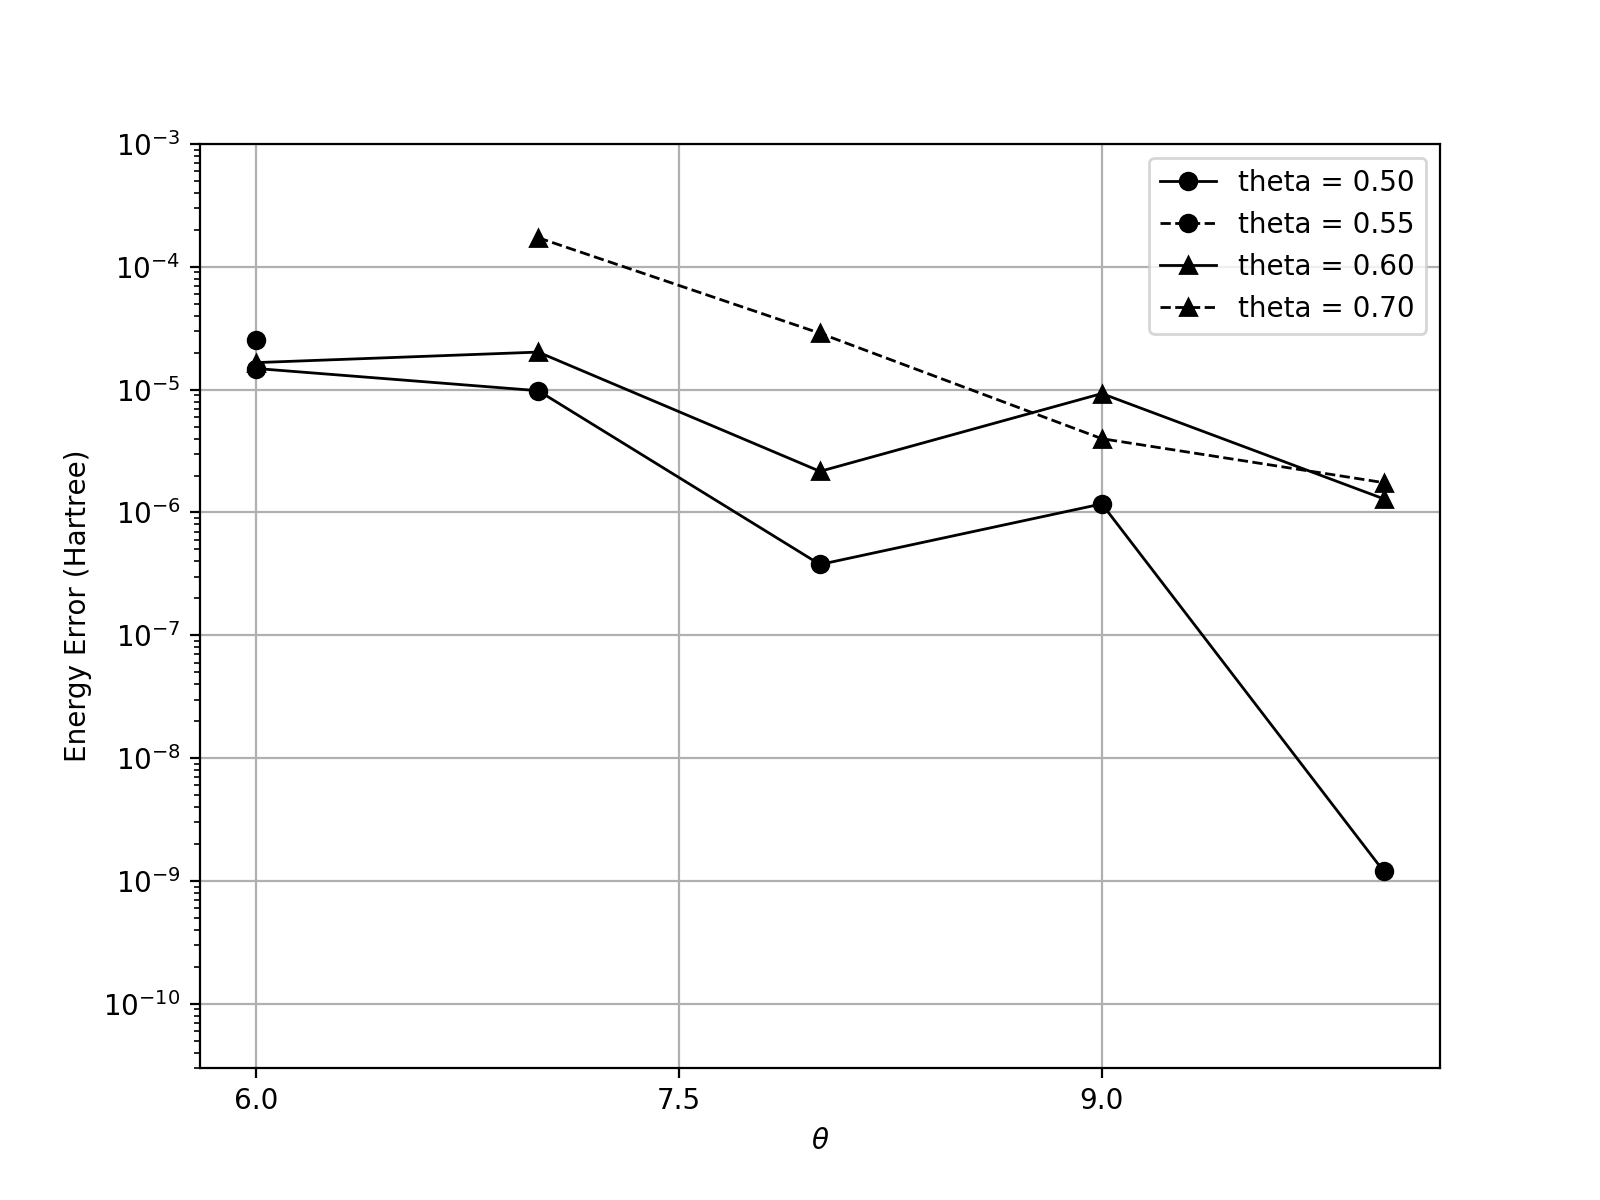

<IPython.core.display.Javascript object>


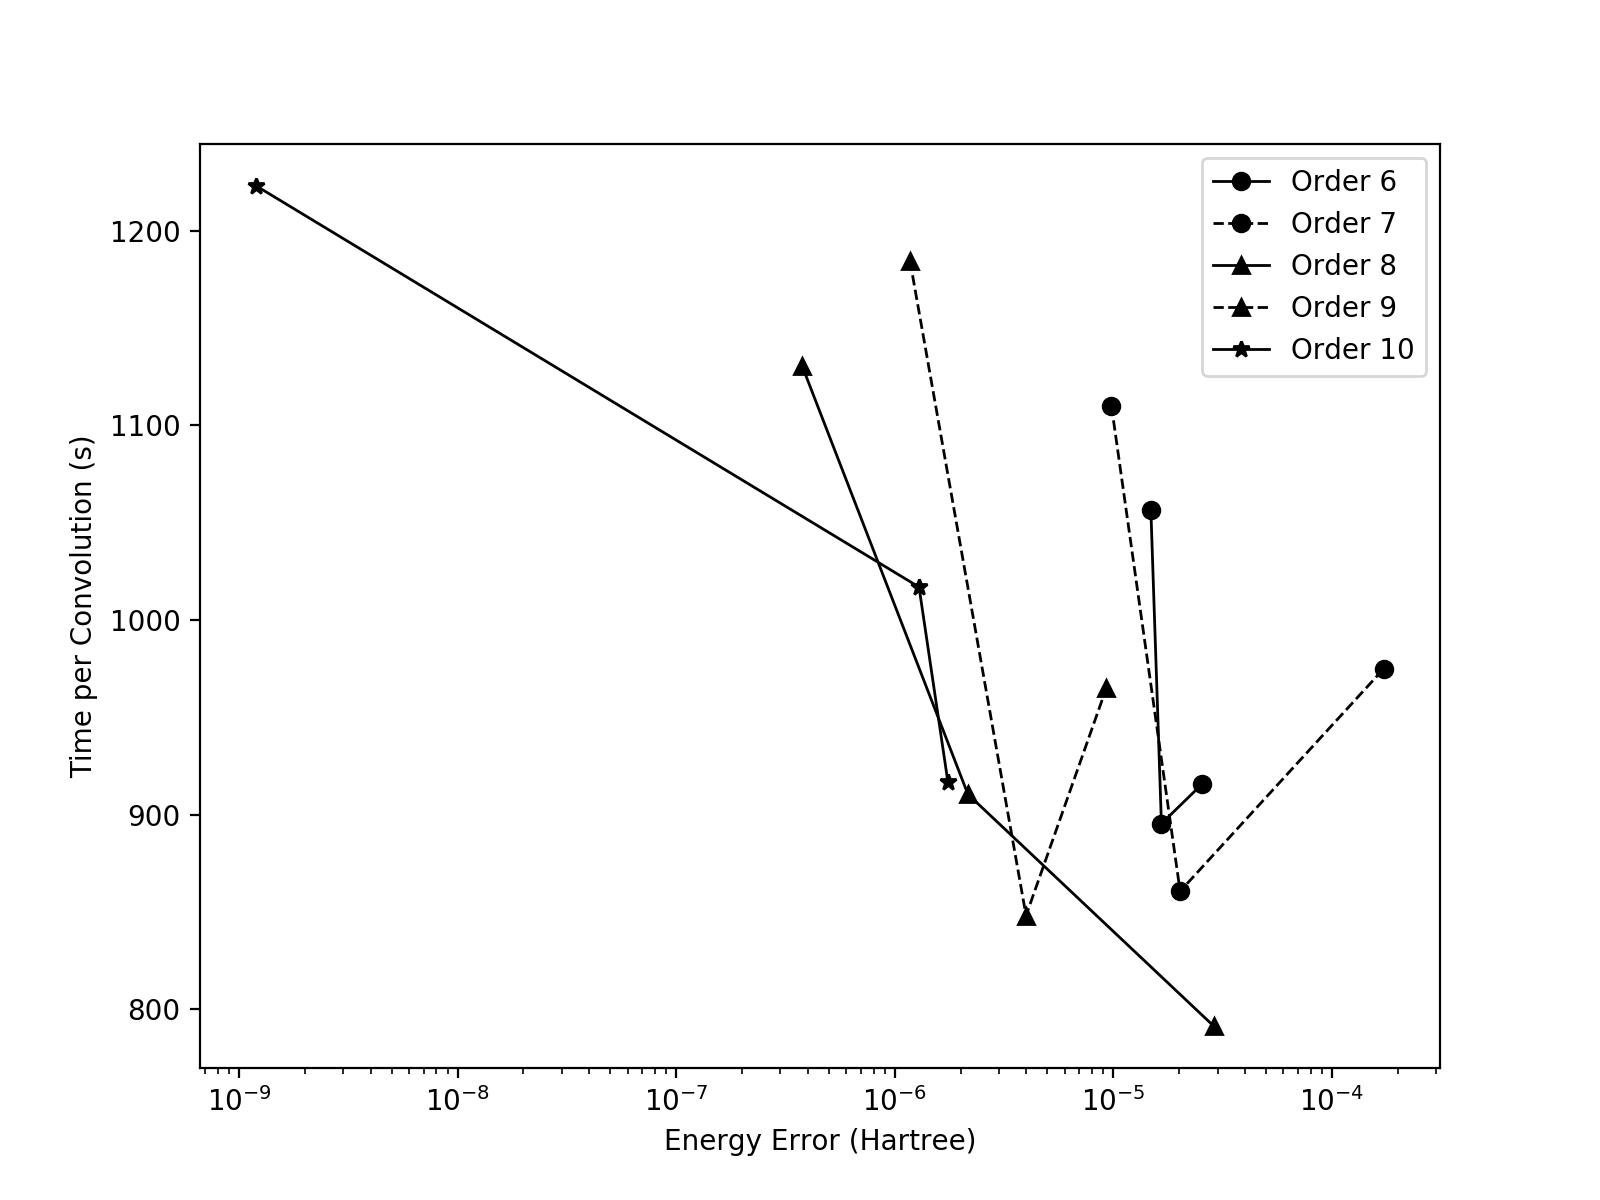

In [130]:
df2 = df.loc[df['Treecode']==True]
df2 = df2.loc[df2['totalIterationCount']<400]
# treecodeAfterFirstSCF(df,'absBandEnergyError', 'theta', 'treecodeOrder')
# treecodeAfterFirstSCF(df,'absHartreeEnergyError', 'theta', 'treecodeOrder')
# treecodeAfterFirstSCF(df,'absTotalEnergyError', 'theta', 'treecodeOrder')
# treecodeApproximationError(df2,'absTotalEnergyError', 'theta','treecodeOrder',save='treecode-approx-error')
treecodeApproximationError(df2,'absTotalEnergyError', 'treecodeOrder','theta',save='treecode-approx-error')
# treecodeAfterFirstSCF(df,'absTotalEnergyError', 'treecodeOrder','theta',save='treecode-approx-error')
# df

# treecodeApproximationTime(df2,'timePerConvolution','absTotalEnergyError', 'treecodeOrder',save='treecode-approx-time')
treecodeApproximationTime(df2,'totalTime','absTotalEnergyError', 'treecodeOrder',save='treecode-approx-time')


In [109]:
df2

,domainSize,minDepth,maxDepth,additionalDepthAtAtoms,depthAtAtoms,order,numberOfCells,numberOfPoints,gradientFree,divideCriterion,...,absHartreeEnergyError,absCorrelationEnergyError,absTotalEnergyError,absKineticEnergyError,BandEnergyError,ExchangeEnergyError,HartreeEnergyError,CorrelationEnergyError,TotalEnergyError,KineticEnergyError
0,20,0,0,0,0,5,5293.0,661625,True,ParentChildrenIntegral,...,0.163762,0.942149,0.035775,0.0,1.304518,-11.997183,-0.163762,-0.942149,0.035775,0.0
1,20,0,0,0,0,5,5293.0,661625,True,ParentChildrenIntegral,...,0.163881,0.942149,0.035743,0.0,1.304366,-11.997182,-0.163881,-0.942149,0.035743,0.0
2,20,0,0,0,0,5,5293.0,661625,True,ParentChildrenIntegral,...,0.163901,0.942149,0.035757,0.0,1.304361,-11.997180,-0.163901,-0.942149,0.035757,0.0
3,20,0,0,0,0,5,5293.0,661625,True,ParentChildrenIntegral,...,0.163768,0.942149,0.035735,0.0,1.304470,-11.997188,-0.163768,-0.942149,0.035735,0.0
4,20,0,0,0,0,5,5293.0,661625,True,ParentChildrenIntegral,...,0.163886,0.942149,0.035748,0.0,1.304367,-11.997181,-0.163886,-0.942149,0.035748,0.0
5,20,0,0,0,0,5,5293.0,661625,True,ParentChildrenIntegral,...,0.163901,0.942149,0.035758,0.0,1.304362,-11.997180,-0.163901,-0.942149,0.035758,0.0
6,20,0,0,0,0,5,5293.0,661625,True,ParentChildrenIntegral,...,0.163916,0.942149,0.035760,0.0,1.304350,-11.997179,-0.163916,-0.942149,0.035760,0.0
7,20,0,0,0,0,5,5293.0,661625,True,ParentChildrenIntegral,...,0.163902,0.942149,0.035757,0.0,1.304362,-11.997180,-0.163902,-0.942149,0.035757,0.0
8,20,0,0,0,0,5,5293.0,661625,True,ParentChildrenIntegral,...,0.163900,0.942149,0.035758,0.0,1.304363,-11.997180,-0.163900,-0.942149,0.035758,0.0
9,20,0,0,0,0,5,5293.0,661625,True,ParentChildrenIntegral,...,0.163896,0.942149,0.035748,0.0,1.304358,-11.997181,-0.163896,-0.942149,0.035748,0.0
